In [27]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

%matplotlib inline

In [28]:
pd.set_option("display.max.columns", None)

In [29]:
os.listdir()

['updated_ski_data.csv',
 '.DS_Store',
 'step2_output.csv',
 'ski_data.csv',
 'step3_output.csv']

In [30]:
os.chdir('data')

FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [31]:
os.listdir()

['updated_ski_data.csv',
 '.DS_Store',
 'step2_output.csv',
 'ski_data.csv',
 'step3_output.csv']

In [32]:
dataframe = pd.read_csv('step3_output.csv', index_col=0)

In [33]:
dataframe.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.000000,45.0,44.0,350.0,47.0,53.0,90.0,0.0,2
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.000000,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.000000,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.000000,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1
5,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,3,1,5,10.0,2.0,0.4,88.0,174.873239,110.0,84.0,300.0,47.0,47.0,107.0,0.0,3


In [34]:
dataframe2 = pd.read_csv('ski_data.csv')

In [35]:
dataframe2.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [36]:
BMR = dataframe2[dataframe2['Name'].str.contains('Big Mountain')]
BMR

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
151,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0


In [37]:
dataframe.columns

Index(['Name', 'state', 'summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac', 'clusters'],
      dtype='object')

In [38]:
BMR.columns

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

In [39]:
dataframe.drop(['clusters'], axis=1, inplace=True)

In [40]:
BMR.drop(['Region','base_elev'], axis=1, inplace=True)

/Users/memanuel0109/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
dataframe.shape

(299, 25)

In [42]:
BMR.shape

(1, 25)

In [43]:
df = dataframe.append(BMR)

In [44]:
df.reset_index(drop=True, inplace=True)

## Fit Models with Training Dataset

In [45]:
from sklearn.cluster import KMeans
x = df.drop(['Name','state'], axis =1).values

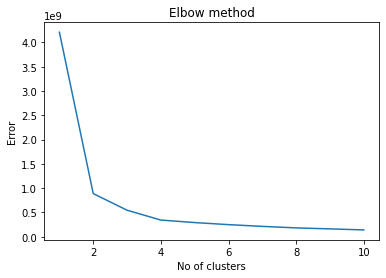

In [46]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

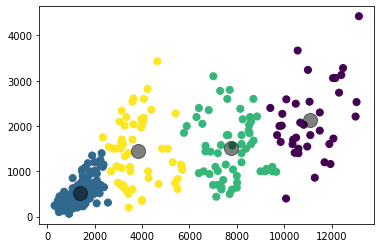

In [49]:
kmeans4 = KMeans(n_clusters=4)
y_kmeans4 = kmeans4.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans4, s=50, cmap='viridis')

centers = kmeans4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [51]:
df['clusters'] = y_kmeans4

In [52]:
df.tail()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
295,Sleeping Giant Ski Resort,Wyoming,7428,810,0,0.0,0,0,0,1,1,1,3,48.0,1.000000,1.0,184.0,18.000000,61.000000,81.0,310.0,42.000000,42.0,77.00000,0.0,2
296,Snow King Resort,Wyoming,7808,1571,0,0.0,0,0,1,1,1,0,3,32.0,2.000000,1.0,400.0,250.000000,121.000000,80.0,300.0,59.000000,59.0,123.00000,110.0,2
297,Snowy Range Ski & Recreation Area,Wyoming,9663,990,0,0.0,0,0,0,1,3,1,5,33.0,2.000000,0.7,75.0,30.000000,131.000000,59.0,250.0,49.000000,49.0,131.00000,0.0,2
298,White Pine Ski Area,Wyoming,9500,1100,0,0.0,0,0,0,2,0,0,2,25.0,2.820789,0.4,370.0,174.873239,114.732441,81.0,150.0,57.916957,49.0,120.26087,0.0,2
299,Big Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,0,3,14,105.0,4.000000,3.3,3000.0,600.000000,123.000000,72.0,333.0,81.000000,81.0,123.00000,600.0,2


In [53]:
df.set_index('Name', inplace=True)

In [54]:
df_model = df.drop('Big Mountain Resort')

In [55]:
df_model.reset_index(inplace=True)

In [56]:
df_model.tail()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
294,Meadowlark Ski Lodge,Wyoming,9500,1000,0,0.0,0,0,0,1,1,1,3,14.0,1.000000,1.5,300.0,174.873239,114.732441,9.0,185.316456,57.916957,57.916957,120.26087,0.0,2
295,Sleeping Giant Ski Resort,Wyoming,7428,810,0,0.0,0,0,0,1,1,1,3,48.0,1.000000,1.0,184.0,18.000000,61.000000,81.0,310.000000,42.000000,42.000000,77.00000,0.0,2
296,Snow King Resort,Wyoming,7808,1571,0,0.0,0,0,1,1,1,0,3,32.0,2.000000,1.0,400.0,250.000000,121.000000,80.0,300.000000,59.000000,59.000000,123.00000,110.0,2
297,Snowy Range Ski & Recreation Area,Wyoming,9663,990,0,0.0,0,0,0,1,3,1,5,33.0,2.000000,0.7,75.0,30.000000,131.000000,59.0,250.000000,49.000000,49.000000,131.00000,0.0,2
298,White Pine Ski Area,Wyoming,9500,1100,0,0.0,0,0,0,2,0,0,2,25.0,2.820789,0.4,370.0,174.873239,114.732441,81.0,150.000000,57.916957,49.000000,120.26087,0.0,2


In [57]:
df.reset_index(inplace=True)

In [58]:
df_BMR = df[df['Name'].str.contains('Big Mountain')]

In [59]:
df_BMR

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
299,Big Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


#### Best Model 

In [60]:
df_model.shape

(299, 26)

In [61]:
X = df_model.drop(['Name','AdultWeekend', 'AdultWeekday', 'state'], axis=1)
y = df_model.AdultWeekend 
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [62]:
X_scaled

array([[-0.46675076,  0.56813334, -0.26195504, ..., -0.99368683,
        -0.80653425,  1.68268896],
       [-0.60869529, -0.97214442, -0.26195504, ...,  1.26584326,
        -0.29139524, -0.47201767],
       [ 2.01032056,  1.50762861, -0.26195504, ...,  0.17252225,
        -0.80653425, -1.54937099],
       ...,
       [ 0.98275345,  0.60645486, -0.26195504, ...,  0.20896628,
         1.08230878,  0.60533564],
       [ 1.49904191, -0.11176455, -0.26195504, ...,  0.50051855,
        -0.80653425,  0.60533564],
       [ 1.45367532,  0.02421503, -0.26195504, ...,  0.10914132,
        -0.80653425,  0.60533564]])

In [63]:
y.shape

(299,)

In [64]:
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [65]:
y_train.max()

158.0

In [66]:
np.linalg.cond(X_train)

2.3977065905554336e+16

In [67]:
lm = linear_model.LinearRegression().fit(X_train, y_train)

In [69]:
y_pred = lm.predict(X_test)

In [70]:
df_model['AdultWeekend'].head()

0    53.0
1    34.0
2    89.0
3    78.0
4    47.0
Name: AdultWeekend, dtype: float64

In [71]:
y_pred

array([ 50.36031992,  40.7871764 ,  65.1514849 ,  63.23410796,
        60.33241901,  51.52550171,  54.78407145,  54.69837472,
       111.52841286,  63.74788403,  50.75515485,  69.01104581,
        67.22203358,  72.14786477,  53.87672435,  56.20539876,
        67.25222029,  66.84390914,  77.0919275 ,  49.98007965,
        51.19148212,  83.18793486,  96.03448842,  60.08772769,
        51.01323065,  53.59894803,  56.99499296,  47.67961721,
        62.57906162,  69.43626093,  44.10980622,  73.86586451,
        64.50053197,  55.61476233,  53.64554579,  77.69420691,
        72.79606232,  38.173559  ,  79.44367331,  63.43895066,
        59.63452857,  61.93254558,  74.18375862,  83.50223902,
        47.87825612,  67.34419399,  69.97696259,  56.08192821,
        54.91571476,  52.74712254,  39.81220187,  69.9212158 ,
        80.44124348,  53.60899479,  79.84290355,  63.49218912,
        62.6638586 ,  76.71602993,  55.15662745,  67.12396541,
        60.82786601, 111.60747612,  49.98384828,  66.40

In [72]:
abs_error_3 = mean_absolute_error(y_test, y_pred)
abs_error_3

11.201961319655817

In [73]:
ex_var_score_3 = explained_variance_score(y_test, y_pred)
ex_var_score_3

0.42594774548136716

In [74]:
lm_int = lm.intercept_
lm_int

62.57762493361293

In [75]:
model = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])

In [76]:
model.sort_values('Coefficient', ascending = False, inplace=True)

In [77]:
print(model)

                    Coefficient
vertical_drop      9.338066e+00
SkiableTerrain_ac  6.200343e+00
fastQuads          3.757332e+00
fastSixes          3.745631e+00
quad               3.650874e+00
daysOpenLastYear   3.480187e+00
averageSnowfall    3.396314e+00
LongestRun_mi      2.734697e+00
TerrainParks       2.402682e+00
total_chairs       2.333463e+00
Runs               1.979715e+00
surface            1.865490e+00
projectedDaysOpen  1.488396e+00
NightSkiing_ac     1.310773e+00
Snow Making_ac     1.293231e+00
clusters           8.668142e-01
triple             8.404902e-01
summit_elev        4.400202e-01
yearsOpen          3.650567e-01
double             3.271501e-01
trams              1.362264e-01
fastEight          2.664535e-15


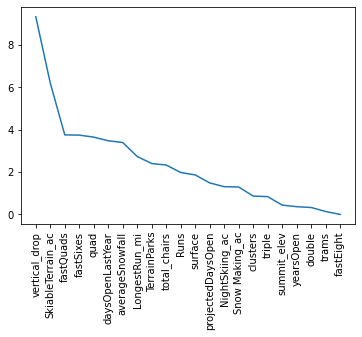

In [78]:
plt.plot(model)
plt.xticks(rotation=90)
plt.show()

## Review the results 

In [79]:
df_BMR

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
299,Big Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


In [80]:
XBMR = df_BMR.drop(['Name','AdultWeekend', 'AdultWeekday', 'state'], axis=1)
yBMR = df_BMR.AdultWeekend 
X_scaledBMR = scaler.transform(XBMR)

In [81]:
X_scaledBMR.shape

(1, 22)

In [82]:
X_scaledBMR

array([[ 0.70693573,  1.57314604, -0.26195504,  0.        , -0.28336883,
         1.88803503,  1.00857063,  3.0205609 , -1.10029395,  0.31024405,
         1.73217762,  1.96294506,  0.88829902,  2.0001298 ,  3.86704921,
         3.88772359,  0.38417505,  0.85644823,  1.33893019,  0.20896628,
         9.49624593,  0.60533564]])

In [83]:
yBMR

299    81.0
Name: AdultWeekend, dtype: float64

In [84]:
print('The ticket price for Big Mountain Resort should be', float(lm.predict(X_scaledBMR)))

The ticket price for Big Mountain Resort should be 87.41924548790655


In [85]:
print('Big Mountain Resorts current ticket price is', df_BMR['AdultWeekend'][299])

Big Mountain Resorts current ticket price is 81.0


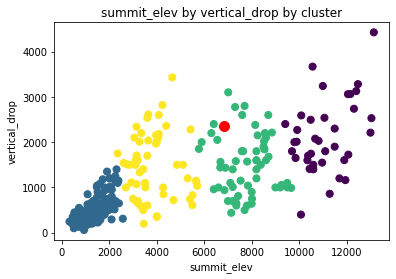

In [89]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(df_BMR['summit_elev'], df_BMR['vertical_drop'], c='red', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('../figures/fig1.png',bbox_inches='tight')

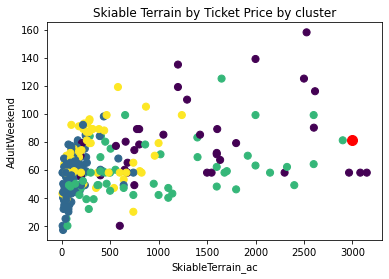

In [90]:
plt.scatter(df['SkiableTerrain_ac'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(df_BMR['SkiableTerrain_ac'], df_BMR['AdultWeekend'], c='red', s=100)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('AdultWeekend')
plt.title('Skiable Terrain by Ticket Price by cluster')
plt.savefig('../figures/fig2.png',bbox_inches='tight')

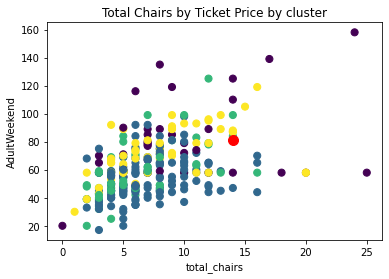

In [91]:
plt.scatter(df['total_chairs'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(df_BMR['total_chairs'], df_BMR['AdultWeekend'], c='red', s=100)
plt.xlabel('total_chairs')
plt.ylabel('AdultWeekend')
plt.title('Total Chairs by Ticket Price by cluster')
plt.savefig('../figures/fig3.png',bbox_inches='tight')

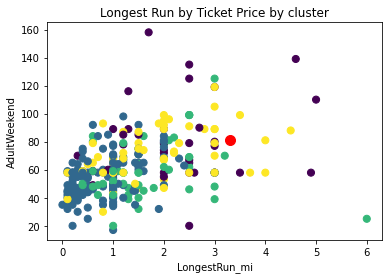

In [92]:
plt.scatter(df['LongestRun_mi'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(df_BMR['LongestRun_mi'], df_BMR['AdultWeekend'], c='red', s=100)
plt.xlabel('LongestRun_mi')
plt.ylabel('AdultWeekend')
plt.title('Longest Run by Ticket Price by cluster')
plt.savefig('../figures/fig4.png',bbox_inches='tight')

## Finalize Code

In [93]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, '../models/regression_model_adultweekend.joblib') 

['../models/regression_model_adultweekend.joblib']

## Finalize Documentation

In [94]:
modeldf = pd.DataFrame(model)

In [95]:
modeldf

,Coefficient
vertical_drop,9.338066e+00
SkiableTerrain_ac,6.200343e+00
fastQuads,3.757332e+00
fastSixes,3.745631e+00
quad,3.650874e+00
daysOpenLastYear,3.480187e+00
averageSnowfall,3.396314e+00
LongestRun_mi,2.734697e+00
TerrainParks,2.402682e+00
total_chairs,2.333463e+00
